In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [5]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

Accuracy  79.16666666666666


/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


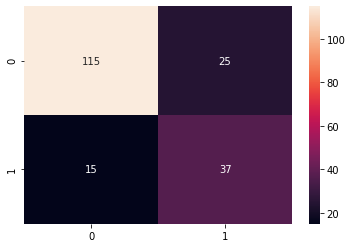

In [7]:
from sklearn.linear_model import LogisticRegression

#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

Accuracy  73.4375


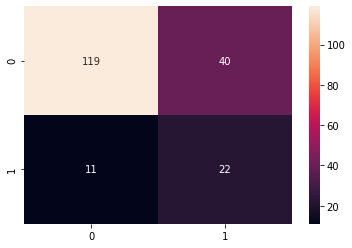

In [8]:
from sklearn.tree import DecisionTreeClassifier
#Model
DT = DecisionTreeClassifier(max_depth=3)

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

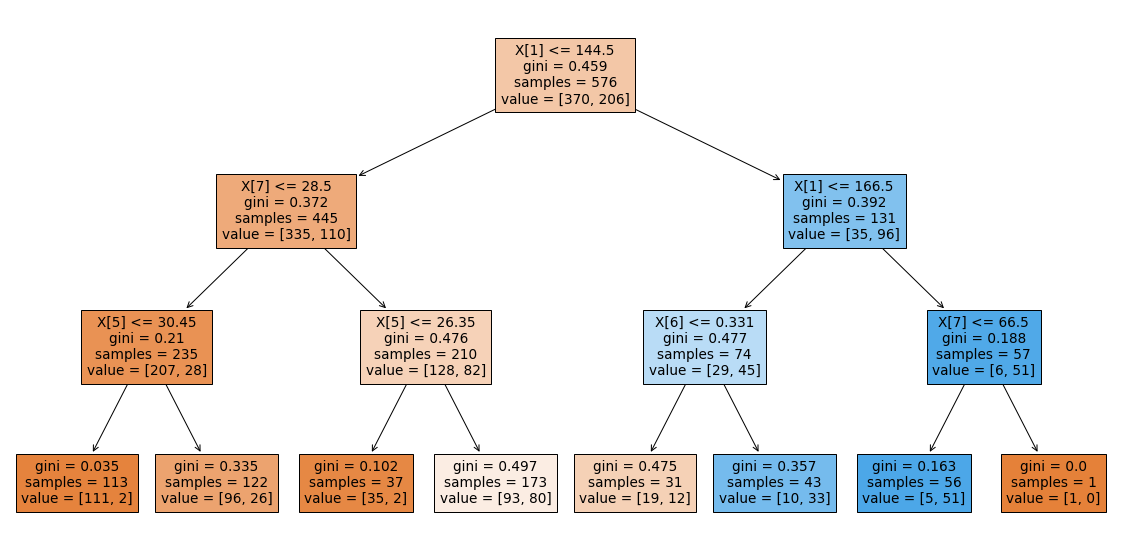

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(DT, filled=True)
plt.show()

In [10]:
from sklearn.tree import export_text

print(export_text(DT))

|--- feature_1 <= 144.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 30.45
|   |   |   |--- class: 0
|   |   |--- feature_5 >  30.45
|   |   |   |--- class: 0
|   |--- feature_7 >  28.50
|   |   |--- feature_5 <= 26.35
|   |   |   |--- class: 0
|   |   |--- feature_5 >  26.35
|   |   |   |--- class: 0
|--- feature_1 >  144.50
|   |--- feature_1 <= 166.50
|   |   |--- feature_6 <= 0.33
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.33
|   |   |   |--- class: 1
|   |--- feature_1 >  166.50
|   |   |--- feature_7 <= 66.50
|   |   |   |--- class: 1
|   |   |--- feature_7 >  66.50
|   |   |   |--- class: 0



Accuracy  77.60416666666666


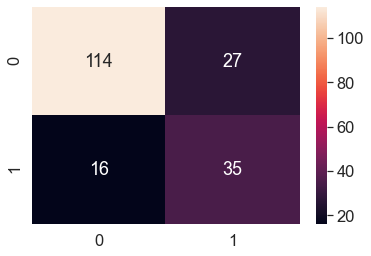

In [11]:
from sklearn.ensemble import RandomForestClassifier

#Model
RF = RandomForestClassifier()

#fiting the model
RF.fit(X_train, y_train)

#prediction
y_pred = RF.predict(X_test)

#Accuracy
print("Accuracy ", RF.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

Accuracy  81.25


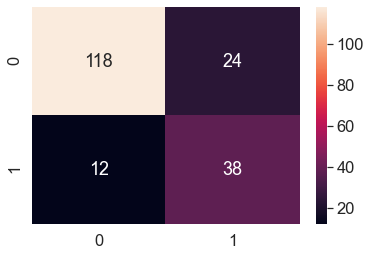

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

Accuracy  79.6875


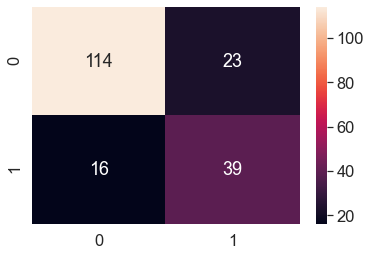

In [13]:
import xgboost as xgb

xgbc = xgb.XGBClassifier(random_state=42)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
(y_test == y_pred).mean() * 100

#Accuracy
print("Accuracy ", xgbc.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

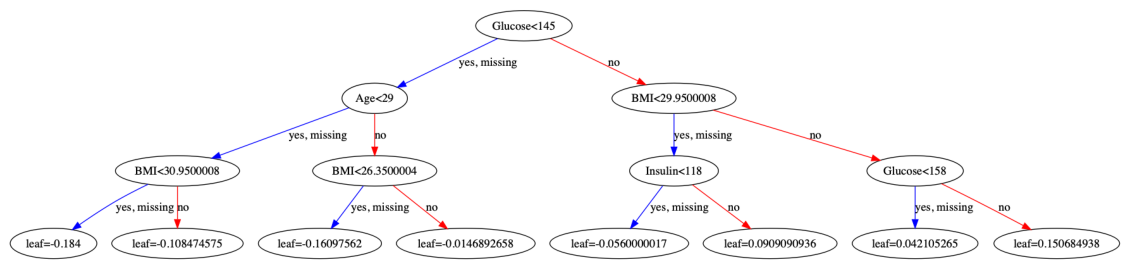

In [14]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

xgb.plot_tree(xgbc)
plt.show()

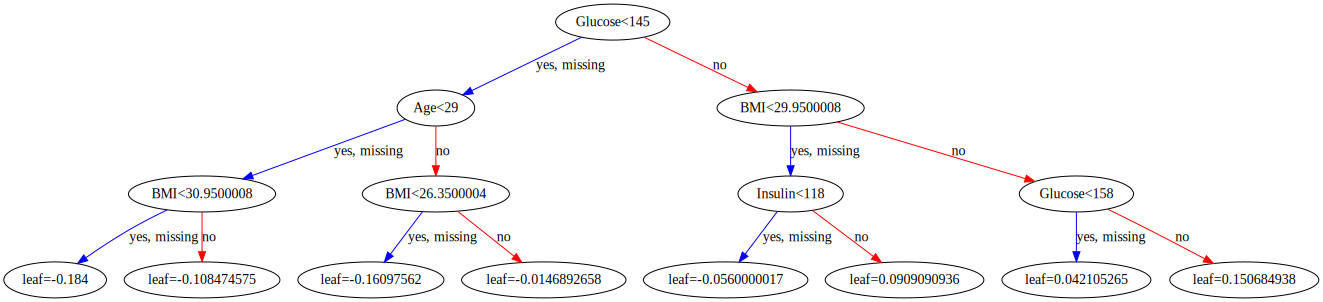

In [23]:
xgb.to_graphviz(xgbc)

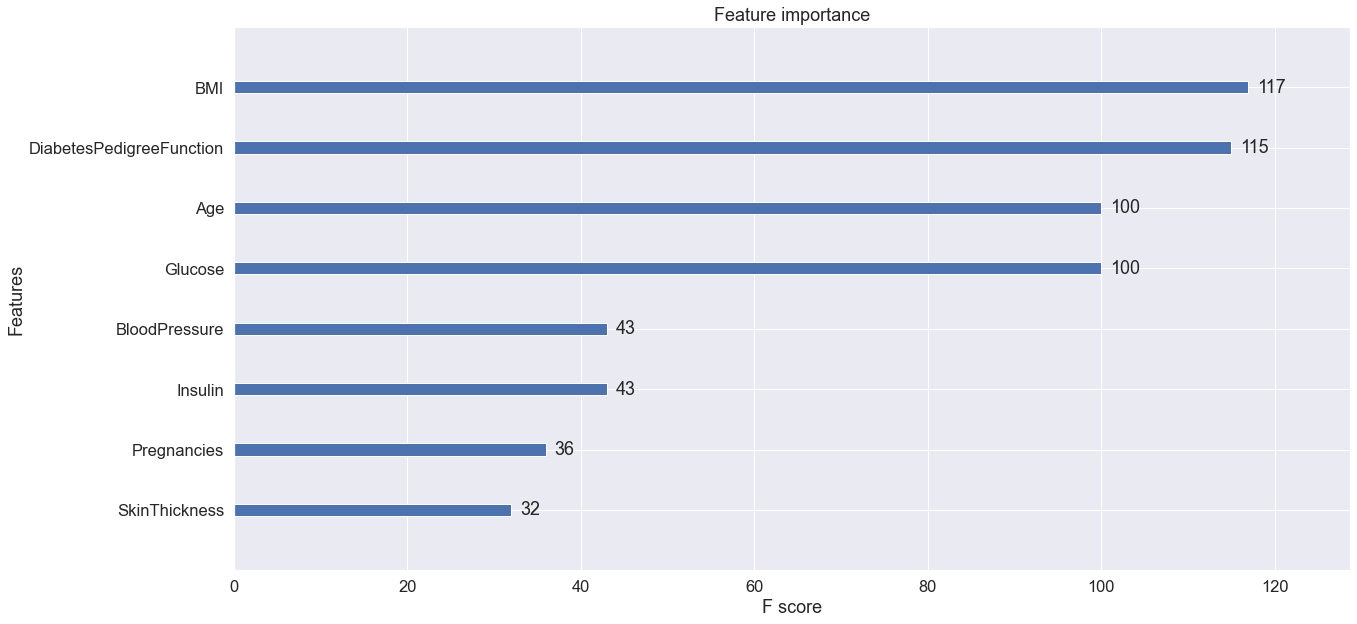

In [15]:
xgb.plot_importance(xgbc)

Accuracy  79.16666666666666


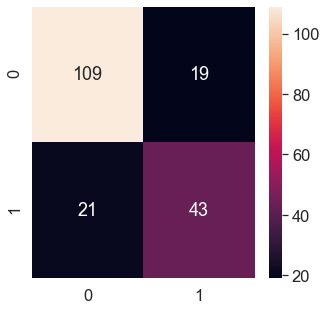

In [16]:
import lightgbm as lgbm

lgb = lgbm.LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
(y_test == y_pred).mean() * 100

#Accuracy
print("Accuracy ", lgb.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')

* 참고 : https://www.kaggle.com/rishpande/pima-indians-diabetes-beginner

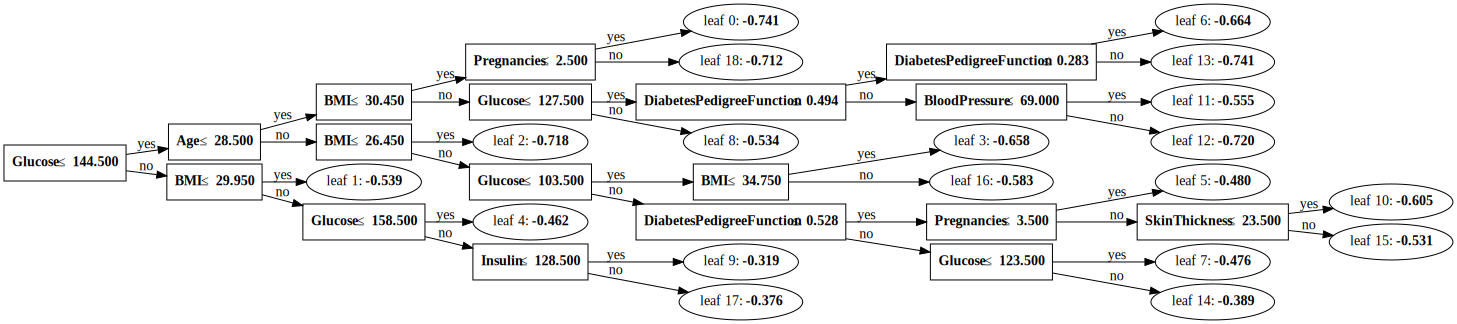

In [17]:
lgbm.create_tree_digraph(lgb)

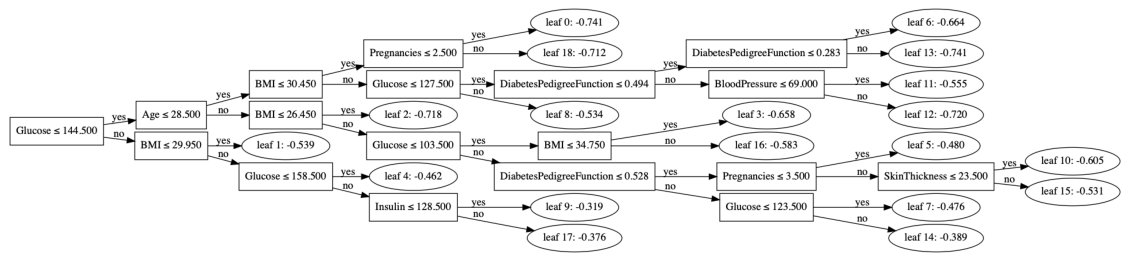

In [21]:
lgbm.plot_tree(lgb)

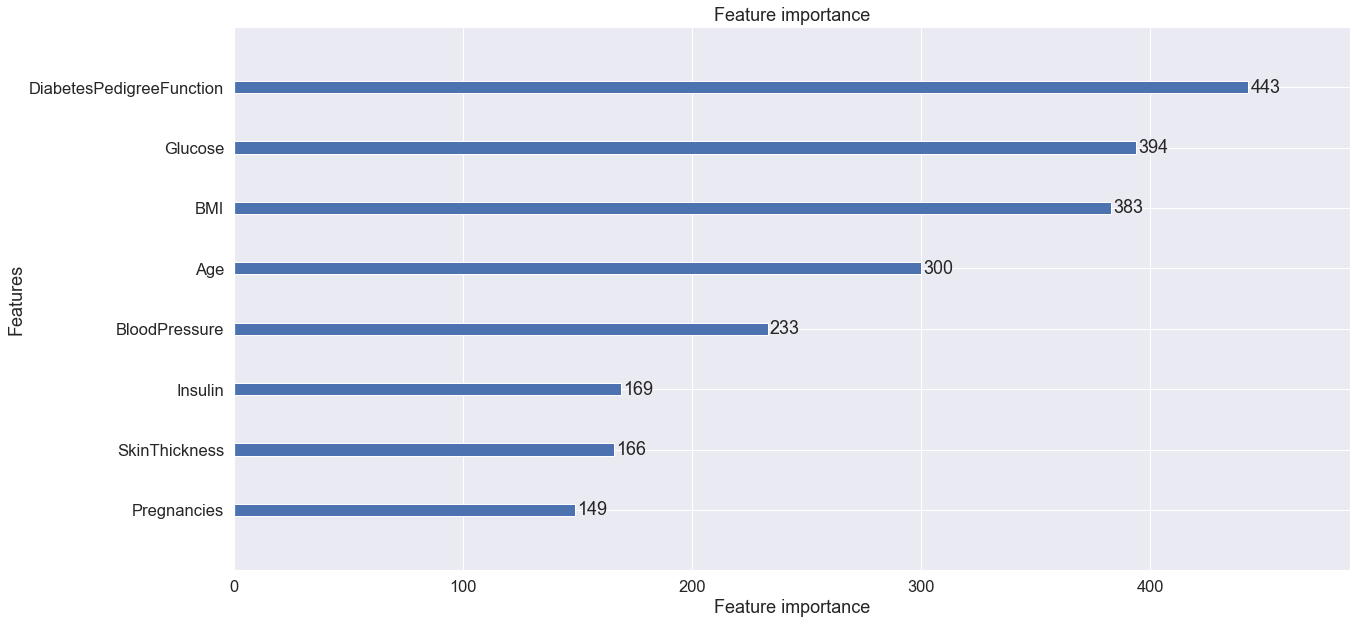

In [18]:
lgbm.plot_importance(lgb)

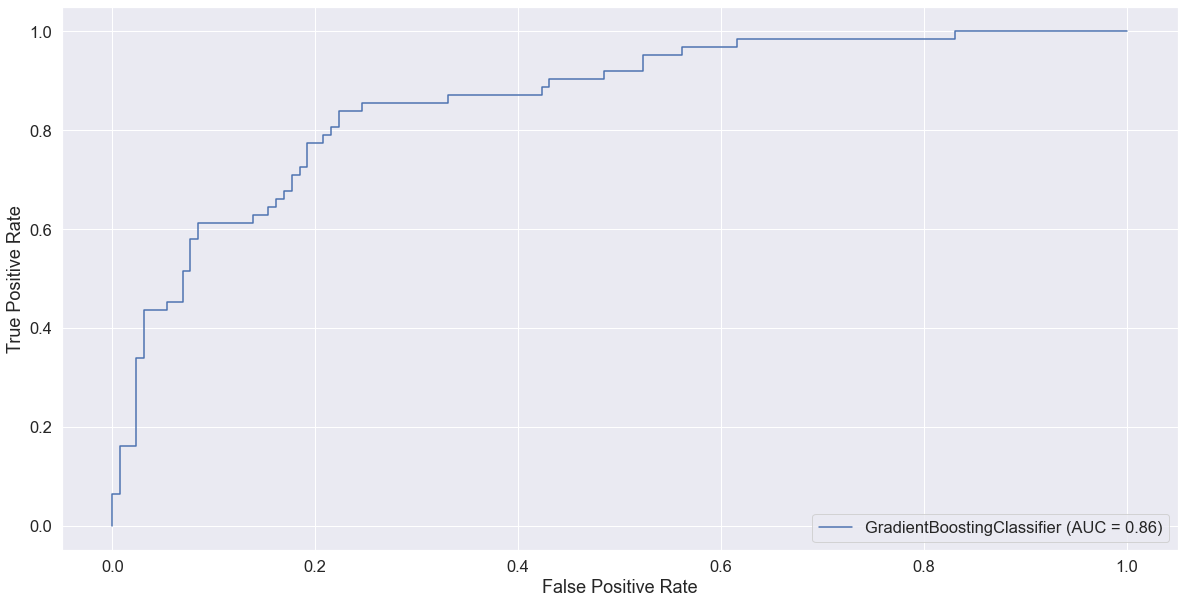

In [19]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)